# Cross-Country Solar Data Comparison
Comparative analysis of GHI, DNI, and DHI across Benin, Sierra Leone, and Togo using cleaned datasets.

In [7]:
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes

In [18]:
import pandas as pd

# Load cleaned datasets
benin_df = pd.read_csv('../data/benin_clean.csv', encoding='latin1')
sl_df = pd.read_csv('../data/sierraleone_clean.csv', encoding='latin1')
togo_df = pd.read_csv('../data/togo_clean.csv', encoding='latin1')

# Add Country column
benin_df['Country'] = 'Benin'
sl_df['Country'] = 'Sierra Leone'
togo_df['Country'] = 'Togo'

# Inspect each dataset
print("Benin Sample:\n", benin_df[['GHI', 'DNI', 'DHI']].head())
print("\nSierra Leone Sample:\n", sl_df[['GHI', 'DNI', 'DHI']].head())
print("\nTogo Sample:\n", togo_df[['GHI', 'DNI', 'DHI']].head())
print("\nBenin Stats:\n", benin_df[['GHI', 'DNI', 'DHI']].describe())

Benin Sample:
    GHI  DNI  DHI
0 -1.2 -0.2 -1.1
1 -1.1 -0.2 -1.1
2 -1.1 -0.2 -1.1
3 -1.1 -0.1 -1.0
4 -1.0 -0.1 -1.0

Sierra Leone Sample:
    GHI  DNI  DHI
0 -0.7 -0.1 -0.8
1 -0.7 -0.1 -0.8
2 -0.7 -0.1 -0.8
3 -0.7  0.0 -0.8
4 -0.7 -0.1 -0.8

Togo Sample:
    GHI  DNI  DHI
0 -6.9 -0.1 -7.7
1 -6.9 -0.1 -7.7
2 -6.8 -0.1 -7.6
3 -6.8 -0.1 -7.6
4 -6.8 -0.1 -7.6

Benin Stats:
                  GHI            DNI            DHI
count  525600.000000  525600.000000  525600.000000
mean      240.559452     167.187516     115.358961
std       331.131327     261.710501     158.691074
min       -12.900000      -7.800000     -12.600000
25%        -2.000000      -0.500000      -2.100000
50%         1.800000      -0.100000       1.600000
75%       483.400000     314.200000     216.300000
max      1413.000000     952.300000     759.200000


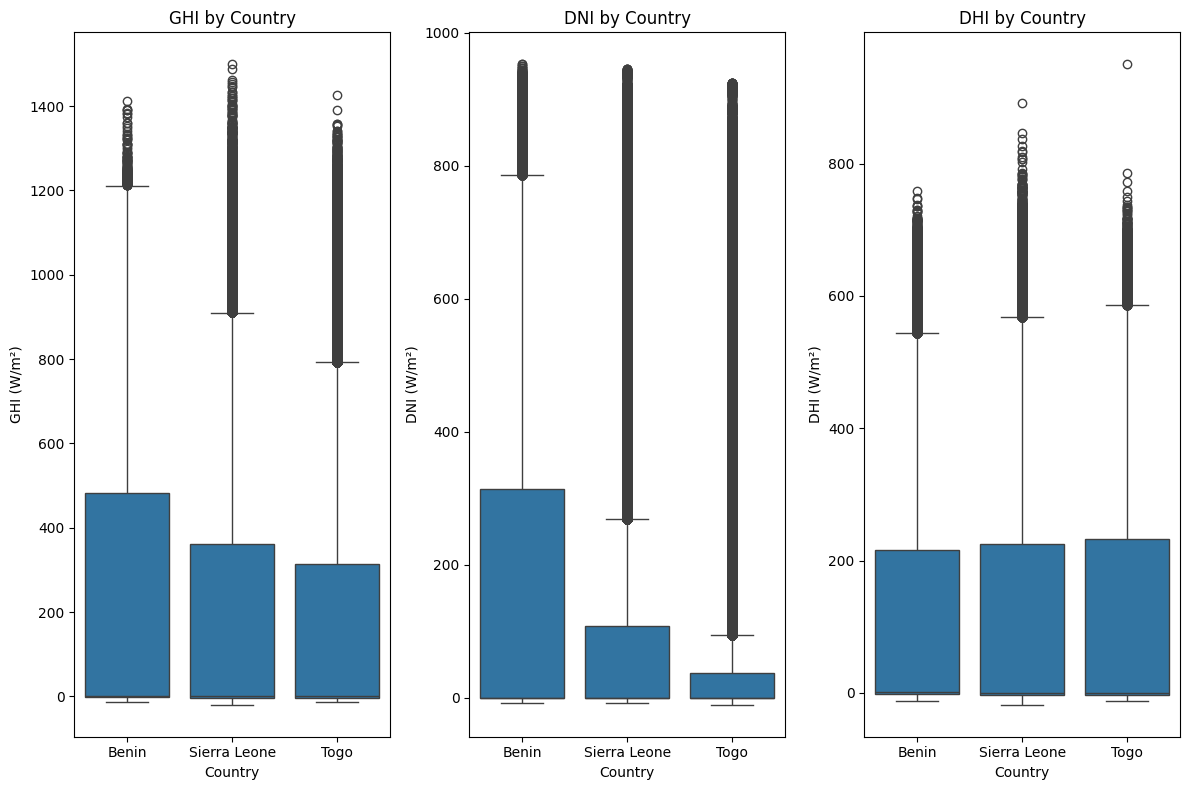

In [20]:
# Boxplots for GHI, DNI, DHI
plt.figure(figsize=(12, 8))
for i, metric in enumerate(['GHI', 'DNI', 'DHI'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Country', y=metric, data=combined_df)
    plt.title(f'{metric} by Country')
    plt.xlabel('Country')
    plt.ylabel(f'{metric} (W/m²)')
plt.tight_layout()
plt.show()

In [21]:
# Summary table
summary_table = combined_df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
print("Summary Table:\n", summary_table)

# Export to CSV (optional, for reference)
summary_table.to_csv('../data/summary_table.csv')

Summary Table:
                  GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          182.78    0.0  277.70   91.33   -0.1  191.25  115.43   -0.1   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          161.00  


In [28]:
from scipy.stats import f_oneway

# ANOVA for GHI
ghi_benin = benin_df['GHI'].dropna()
ghi_sl = sl_df['GHI'].dropna()
ghi_togo = togo_df['GHI'].dropna()
stat, p_value = f_oneway(ghi_benin, ghi_sl, ghi_togo)
print(f"ANOVA for GHI: F-statistic = {stat:.2f}, p-value = {p_value:.4f}")

# ANOVA for DNI
dni_benin = benin_df['DNI'].dropna()
dni_sl = sl_df['DNI'].dropna()
dni_togo = togo_df['DNI'].dropna()
stat, p_value = f_oneway(dni_benin, dni_sl, dni_togo)
print(f"ANOVA for DNI: F-statistic = {stat:.2f}, p-value = {p_value:.4f}")

# ANOVA for DHI
dhi_benin = benin_df['DHI'].dropna()
dhi_sl = sl_df['DHI'].dropna()
dhi_togo = togo_df['DHI'].dropna()
stat, p_value = f_oneway(dhi_benin, dhi_sl, dhi_togo)
print(f"ANOVA for DHI: F-statistic = {stat:.2f}, p-value = {p_value:.4f}")

ANOVA for GHI: F-statistic = 4950.26, p-value = 0.0000
ANOVA for DNI: F-statistic = 15407.31, p-value = 0.0000
ANOVA for DHI: F-statistic = 19.37, p-value = 0.0000
